In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import simtk.openmm as mm
import simtk.unit as unit
import simtk.openmm.app as app
from tqdm import tqdm

In [2]:
# Definiendo el toy model

n_particles = 1
system = mm.System()
mass   = 14.007 * unit.amu # masa del átomo N
system.addParticle(mass)

force = mm.CustomExternalForce('Eo*(C*x^4-x^2)+M*x + (K/2.0)*(y^2+z^2)')
force.addGlobalParameter('K', 35 * unit.kilocalories_per_mole/unit.angstrom**2)
force.addGlobalParameter('Eo', 6.0 * unit.kilocalories_per_mole/unit.angstrom**2)
force.addGlobalParameter('C', 0.4 * 1/unit.angstrom**2)
force.addGlobalParameter('M', 0.25 * unit.kilocalories_per_mole/unit.angstrom)
force.addParticle(0, [])
system.addForce(force)

0

In [7]:
# Réplica 1 300 K

# Formalismo NVT
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA
temperature = 300*unit.kelvin
pressure    = None

step_size       = 0.01*unit.picoseconds
num_steps       = 200000
saving_period   = 100
num_steps_saved = int(num_steps/saving_period)

friction   = 1.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, step_size)

platform_name = 'CPU'  
platform = mm.Platform.getPlatformByName(platform_name)

times      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies     = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

initial_positions  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)
context.setVelocitiesToTemperature(temperature)

state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

for ii in tqdm(range(num_steps_saved)):
    context.getIntegrator().step(saving_period)
    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()[0]
    velocities[ii] = state.getVelocities()[0]
    kinetic_energies[ii]=state.getKineticEnergy()
    potential_energies[ii]=state.getPotentialEnergy()

100%|██████████| 2000/2000 [00:31<00:00, 63.08it/s]


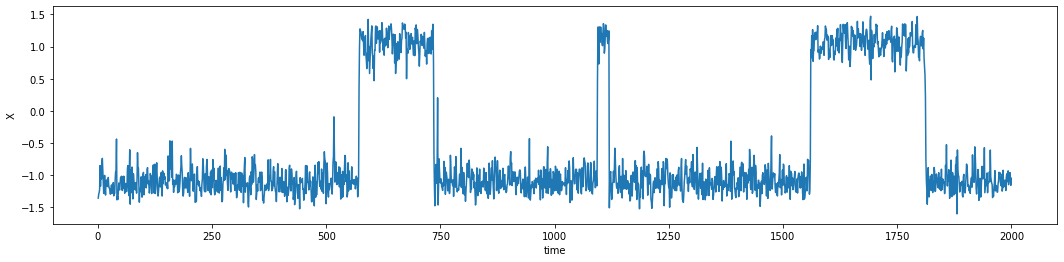

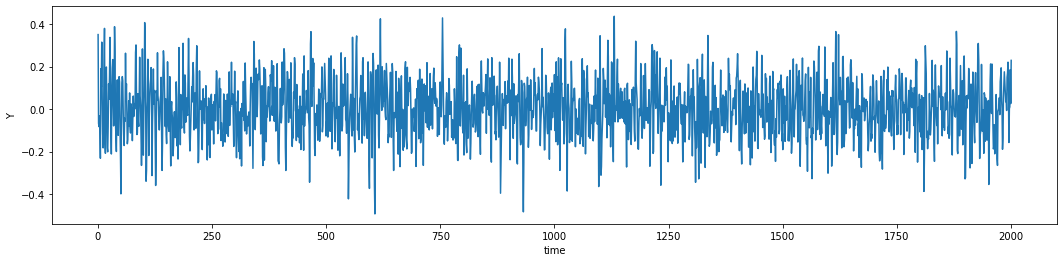

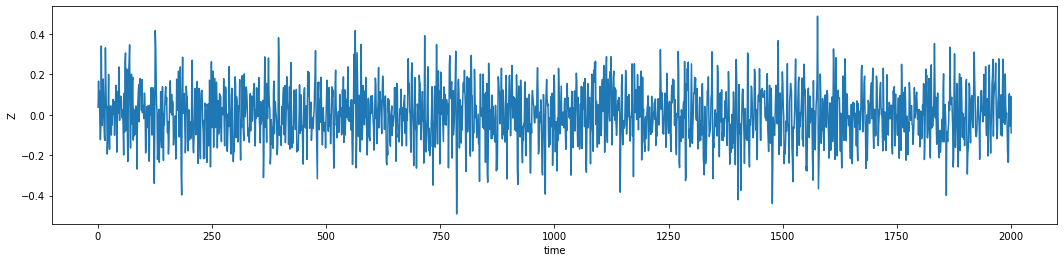

In [8]:
plt.rcParams['figure.figsize'] = 18, 4
for ii, ylabel in zip(range(3),['X','Y','Z']):
    plt.plot(times,positions[:,ii])
    plt.ylabel(ylabel)
    plt.xlabel('time')
    plt.show()

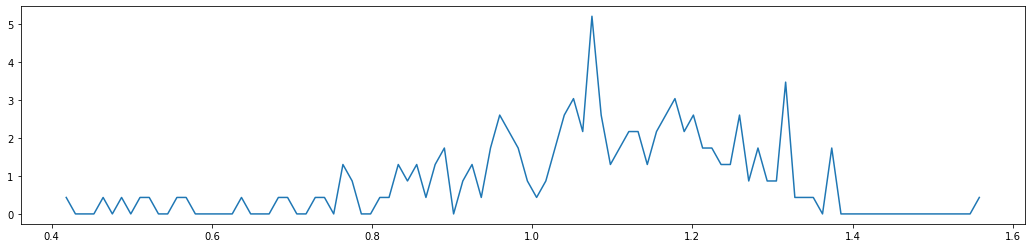

In [6]:
hist, bin_edges = np.histogram(positions[:,0],bins=100, density=True)
plt.plot((bin_edges[1:]+bin_edges[:-1])/2.0,hist)
plt.show()

In [7]:
# Réplica 1 300 K

# Formalismo NVT
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA
temperature = 300*unit.kelvin
pressure    = None

step_size       = 0.01*unit.picoseconds
num_steps       = 200000
saving_period   = 100
num_steps_saved = int(num_steps/saving_period)

friction   = 1.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, step_size)

platform_name = 'CPU'  
platform = mm.Platform.getPlatformByName(platform_name)

times      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies    = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

initial_positions  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)
context.setVelocitiesToTemperature(temperature)

state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

for ii in tqdm(range(num_steps_saved)):
    context.getIntegrator().step(saving_period)
    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()[0]
    velocities[ii] = state.getVelocities()[0]
    kinetic_energies[ii]=state.getKineticEnergy()
    potential_energies[ii]=state.getPotentialEnergy()
    

temperature2 = 304*unit.kelvin
integrator2 = mm.LangevinIntegrator(temperature, friction, step_size)

times2      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions2  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities2 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies2   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies2     = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

initial_positions2  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context2 = mm.Context(system, integrator2, platform)
context2.setPositions(initial_positions)
context2.setVelocitiesToTemperature(temperature)

state2 = context2.getState(getEnergy=True, getPositions=True, getVelocities=True)
times2[0] = state.getTime()
positions2[0] = state.getPositions()[0]
velocities2[0] = state.getVelocities()[0]
kinetic_energies2[0]=state.getKineticEnergy()
potential_energies2[0]=state.getPotentialEnergy()

for jj in tqdm(range(num_steps_saved)):
    context2.getIntegrator().step(saving_period)
    state2 = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times2[jj] = state.getTime()
    positions2[jj] = state.getPositions()[0]
    velocities2[jj] = state.getVelocities()[0]
    kinetic_energies2[jj]=state.getKineticEnergy()
    potential_energies[jj]=state.getPotentialEnergy()

100%|██████████| 2000/2000 [00:55<00:00, 36.03it/s]


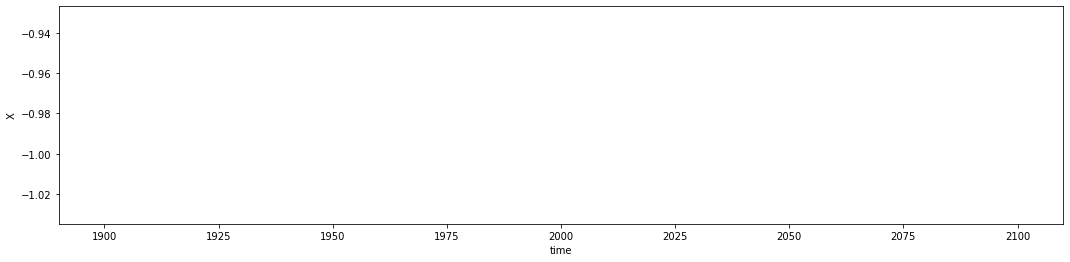

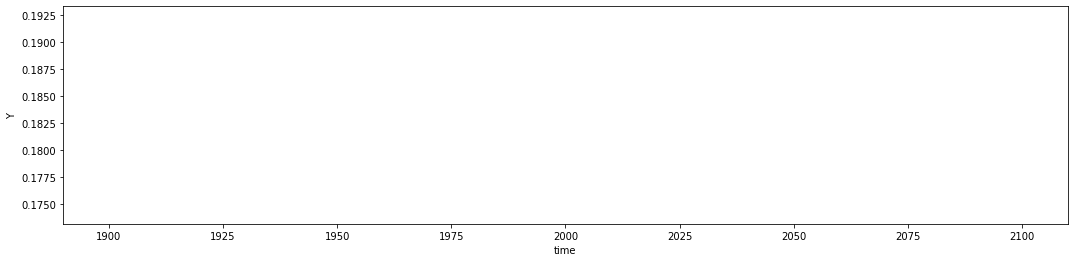

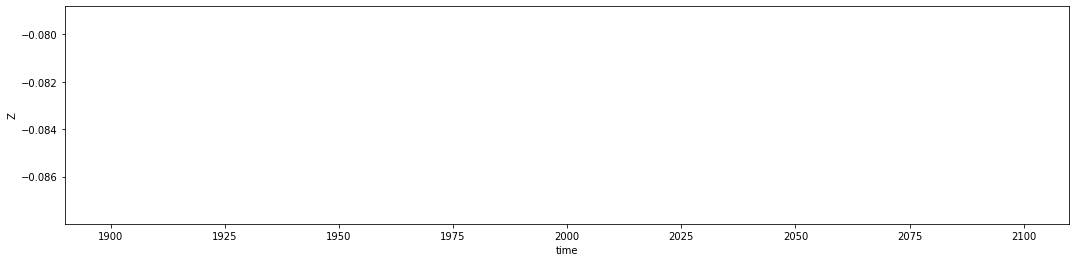

In [10]:
plt.rcParams['figure.figsize'] = 18, 4
for ii, ylabel in zip(range(3),['X','Y','Z']):
    plt.plot(times2,positions2[:,ii])
    plt.ylabel(ylabel)
    plt.xlabel('time')
    plt.show()

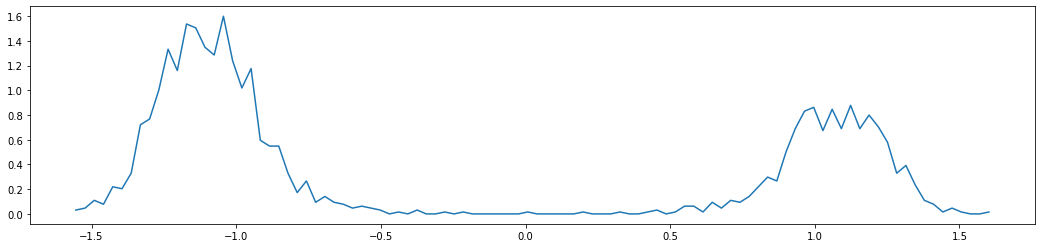

In [6]:
hist, bin_edges = np.histogram(positions[:,0],bins=100, density=True)
plt.plot((bin_edges[1:]+bin_edges[:-1])/2.0,hist)
plt.show()